In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake 
import os
from scipy.optimize import minimize
import tqdm

Reading outline from icepack database


2024-05-08 04:36:26.917516: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 04:36:26.918607: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 04:36:26.967552: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 04:36:27.138050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 04:36:27.883180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.01, read_mesh = False, drichlet_ids = [2,3,4], lcar = 3.5e3)

Reading outline from icepack database


In [3]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [4]:
u =  invert_pig.simulation()
firedrake.assemble(invert_pig.loss_functional(u))

162420450.86762065

In [5]:
#df = invert_pig.get_dataframe(u)
#df.to_csv('new_c_baseline.csv')

In [5]:
invert_pig.compute_C_theta_ML_regress(filename = 'model_7_split')
u =  invert_pig.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/firedrake/firedrake/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/firedrake/firedrake/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


663/663 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [6]:
firedrake.assemble(invert_pig.loss_functional(u))
#6 variables : 381
#7 variables : 388
#7 variable split: 818.3298355786566

818.3298355786566

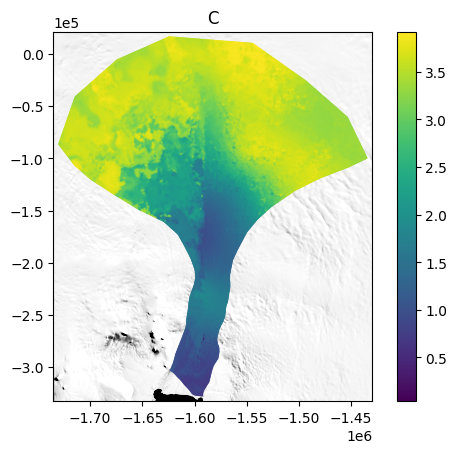

In [7]:
invert_pig.plot_C(vmin=None, vmax=None)

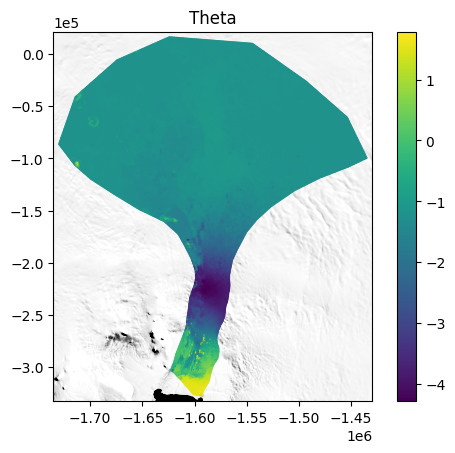

In [8]:
invert_pig.plot_theta(vmin=None, vmax=None)

In [9]:
# final_time = 2.0
# num_steps = 200 
# final_time = 4.5
# num_steps = 450
# final_time = 1.0
# num_steps = 100
final_time = 2.0
num_steps = 200
dt = final_time / num_steps
for step in tqdm.trange(num_steps):
    h,s = invert_pig.simulation_prognostic(u, dt)
    #invert_pig.compute_C_theta_ML_regress(filename = 'model')
    u =  invert_pig.simulation(u)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [07:46<00:00,  2.33s/it]


In [10]:
#folder_path = "completed/24/"
folder_path = "completed/24/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


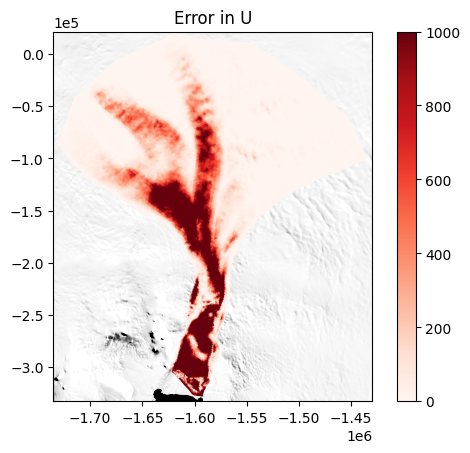

In [15]:
invert_pig.plot_u_error(u, vmax = 1000)

In [12]:
firedrake.assemble(invert_pig.loss_functional(u))

1176.3867388443534

In [15]:
# model_6
# no update C theta: 1010.1404986130862
# update C theta: 2760
# model 7
# no update C theta: 1030.2524784678258
# model 7 split
# no update C theta: 1176.3867388443534